In [193]:
import pickle
import numpy as np

In [194]:
with open('train_qa.txt','rb') as f:
    train_data=pickle.load(f)
    

In [195]:
print(train_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [196]:
type(train_data)

list

In [197]:
type(train_data[1])  # train data is list of tuple

tuple

In [198]:
len(train_data)

10000

In [199]:
with open('test_qa.txt','rb') as f:
    test_data=pickle.load(f)

In [200]:
test_data[0]   # story, queation and answer

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [201]:
len(test_data)

1000

In [202]:
' '.join(train_data[0][0]) # story

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [203]:
' '.join(train_data[0][1]) # queation

'Is Sandra in the hallway ?'

In [204]:
' '.join(train_data[0][2]) # answer

'n o'

In [205]:
## we need to make a vocab which is in both test and train data
all_data=test_data+train_data

In [206]:
len(all_data)

11000

### making the vocab of all words in the train and tes data

In [207]:
vocab=set()
for story,question,ans in all_data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))
vocab.add('yes')
vocab.add('no')
    

In [208]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [209]:
len(vocab)

37

### longest question and story in dataset

In [210]:
maxstry_len=max([len(data[0]) for data in all_data])

In [211]:
maxques_len=max([len(data[1]) for data in all_data])

In [212]:
maxques_len

6

In [213]:
maxstry_len

156

### vectorize the text vocabulary

In [214]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [215]:
token=Tokenizer(filters=[]) # we don't waht to filter the default filter to block !?*.. etc

In [216]:
token.fit_on_texts(vocab)

In [217]:
token.word_index

{'bathroom': 1,
 'dropped': 2,
 'to': 3,
 'bedroom': 4,
 'garden': 5,
 'grabbed': 6,
 'down': 7,
 'yes': 8,
 'kitchen': 9,
 'up': 10,
 'took': 11,
 'apple': 12,
 'moved': 13,
 'milk': 14,
 'discarded': 15,
 'football': 16,
 'hallway': 17,
 'daniel': 18,
 'no': 19,
 'left': 20,
 'travelled': 21,
 'got': 22,
 'office': 23,
 'journeyed': 24,
 'john': 25,
 'there': 26,
 '?': 27,
 '.': 28,
 'is': 29,
 'put': 30,
 'picked': 31,
 'sandra': 32,
 'the': 33,
 'in': 34,
 'back': 35,
 'mary': 36,
 'went': 37}

### we want to tokenize the story questin and ans

In [218]:
train_story_text=[]
train_ques_text=[]
train_ans_text=[]

In [219]:
for story,ques,ans in train_data:
    train_story_text.append(story)
    train_ques_text.append(ques)
    train_ans_text.append(ans)

In [220]:
train_story_text # list of a list

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [221]:
train_story_seq=token.texts_to_sequences(train_story_text)

In [222]:
len(train_story_seq)  # tokenize the all the text in the story

10000

In [223]:
train_ques_seq=token.texts_to_sequences(train_ques_text) # tokenize the all question in story

In [224]:
train_ans_seq=token.texts_to_sequences(train_ans_text) # tokeniza all the ans of question in story

In [225]:
train_ans_seq

[[19],
 [19],
 [19],
 [8],
 [8],
 [8],
 [19],
 [19],
 [19],
 [8],
 [8],
 [8],
 [8],
 [19],
 [8],
 [8],
 [19],
 [8],
 [8],
 [8],
 [19],
 [8],
 [19],
 [19],
 [19],
 [19],
 [8],
 [19],
 [19],
 [19],
 [8],
 [8],
 [19],
 [8],
 [19],
 [19],
 [19],
 [19],
 [8],
 [19],
 [19],
 [8],
 [19],
 [19],
 [19],
 [19],
 [8],
 [8],
 [19],
 [19],
 [8],
 [8],
 [8],
 [8],
 [19],
 [8],
 [19],
 [8],
 [19],
 [8],
 [19],
 [19],
 [19],
 [19],
 [8],
 [8],
 [8],
 [19],
 [8],
 [19],
 [19],
 [8],
 [8],
 [8],
 [19],
 [19],
 [19],
 [19],
 [19],
 [19],
 [8],
 [8],
 [8],
 [8],
 [19],
 [8],
 [8],
 [19],
 [8],
 [19],
 [19],
 [8],
 [19],
 [19],
 [8],
 [8],
 [19],
 [8],
 [8],
 [19],
 [19],
 [19],
 [8],
 [8],
 [19],
 [19],
 [19],
 [8],
 [19],
 [19],
 [8],
 [8],
 [19],
 [19],
 [8],
 [19],
 [8],
 [8],
 [8],
 [19],
 [19],
 [8],
 [8],
 [19],
 [19],
 [19],
 [8],
 [19],
 [19],
 [8],
 [19],
 [8],
 [19],
 [8],
 [8],
 [8],
 [8],
 [8],
 [19],
 [19],
 [19],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [19],
 [8],
 [19],
 [8],
 [8],
 [19],
 [19

In [306]:
len(train_story_seq)

10000

In [310]:
type(train_story_seq)

list

In [315]:
test_story=np.array(train_story_seq[0])

In [316]:
type(test_story)

numpy.ndarray

In [317]:
test_story

array([36, 13,  3, 33,  1, 28, 32, 24,  3, 33,  4, 28])

### Make a function to vactorize the story  

In [71]:
# def vector_from_story(data,tokens,max_story_ln,max_ques_ln):
    
#     X_story=[]
#     X_ques=[]
#     X_ans=[]
    
#     for story,ques,ans in train_data:
#         X_story.append(story)
#         X_ques.append(ques)
#         X_ans.append(ans)
    
#     X_story_seq=tokens.texts_to_sequences(X_story)
#     X_ques_seq=tokens.texts_to_sequences(X_ques)
#     X_ans_seq=tokens.texts_to_sequences(X_ans)

#     return pad_sequences(X_story_seq,maxlen=max_story_ln),pad_sequences(X_ques_seq,maxlen=max_ques_ln),pad_sequences(X_ans_seq,maxlen=len(tokens.word_index)+1)

In [163]:
# #def vector_from_story2(data,tokens,max_story_ln,max_ques_ln):
    
#     X_story=[]
#     X_ques=[]
#     X_ans=[]
    
#     for story,ques,ans in train_data:
#         X_story.append(story)
#         X_ques.append(ques)
#         y = np.zeros(len(tokens.word_index) + 1)
#         y[tokens.word_index[ans]]=1
#         X_ans.append(y)
    
#     X_story_seq=tokens.texts_to_sequences(X_story)
#     X_ques_seq=tokens.texts_to_sequences(X_ques)
   
#     return (pad_sequences(X_story_seq,maxlen=max_story_ln),pad_sequences(X_ques_seq,maxlen=max_ques_ln),np.array(X_ans))

In [226]:
def vector_from_story3(data,token,max_story_len,max_ques_len):
     
    X = []
    Xq = []
    Y = []
    
    
    for story, query, answer in data:
        
        x = [token.word_index[word.lower()] for word in story]
        xq = [token.word_index[word.lower()] for word in query]
        y = np.zeros(len(token.word_index) + 1)
        y[token.word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
   
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_ques_len), np.array(Y))

### **  Stop ---->skip to continue

In [72]:
inputs_train, queries_train, answers_train = vector_from_story(train_data,token,maxstry_len,maxques_len)

In [73]:
inputs_train

array([[ 0,  0,  0, ..., 33,  4, 28],
       [ 0,  0,  0, ..., 33, 17, 28],
       [ 0,  0,  0, ..., 33,  1, 28],
       ...,
       [ 0,  0,  0, ..., 33,  4, 28],
       [ 0,  0,  0, ..., 14, 26, 28],
       [ 0,  0,  0, ..., 12, 26, 28]])

In [74]:
inputs_test, queries_test, answers_test = vector_from_story(test_data,token,maxstry_len,maxques_len)

In [75]:
inputs_test

array([[ 0,  0,  0, ..., 33,  4, 28],
       [ 0,  0,  0, ..., 33, 17, 28],
       [ 0,  0,  0, ..., 33,  1, 28],
       ...,
       [ 0,  0,  0, ..., 33,  4, 28],
       [ 0,  0,  0, ..., 14, 26, 28],
       [ 0,  0,  0, ..., 12, 26, 28]])

In [76]:
answers_test

array([[ 0,  0,  0, ...,  0,  0, 19],
       [ 0,  0,  0, ...,  0,  0, 19],
       [ 0,  0,  0, ...,  0,  0, 19],
       ...,
       [ 0,  0,  0, ...,  0,  0, 19],
       [ 0,  0,  0, ...,  0,  0, 19],
       [ 0,  0,  0, ...,  0,  0,  8]])

In [77]:
queries_test

array([[29, 32, 34, 33, 17, 27],
       [29, 18, 34, 33,  1, 27],
       [29, 18, 34, 33, 23, 27],
       ...,
       [29, 32, 34, 33, 17, 27],
       [29, 36, 34, 33,  9, 27],
       [29, 36, 34, 33,  4, 27]])

In [145]:
answers_train[129][37]

8

In [142]:
answers_train

array([[ 0,  0,  0, ...,  0,  0, 19],
       [ 0,  0,  0, ...,  0,  0, 19],
       [ 0,  0,  0, ...,  0,  0, 19],
       ...,
       [ 0,  0,  0, ...,  0,  0, 19],
       [ 0,  0,  0, ...,  0,  0, 19],
       [ 0,  0,  0, ...,  0,  0,  8]])

In [164]:
inputs_train1, queries_train1, answers_train1 = vector_from_story2(train_data,token,maxstry_len,maxques_len)

In [165]:
answers_train1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [166]:
inputs_test1, queries_test1, answers_test1 = vector_from_story2(test_data,token,maxstry_len,maxques_len)

In [167]:
answers_test1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [168]:
sum(answers_test1)

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 5012.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0., 4988.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.])

### continue...

### lucky 3

In [227]:
inputs_train2, queries_train2, answers_train2 = vector_from_story3(train_data,token,maxstry_len,maxques_len)

In [228]:
inputs_test2, queries_test2, answers_test2 = vector_from_story3(test_data,token,maxstry_len,maxques_len)

In [229]:
inputs_train2

array([[ 0,  0,  0, ..., 33,  4, 28],
       [ 0,  0,  0, ..., 33, 17, 28],
       [ 0,  0,  0, ..., 33,  1, 28],
       ...,
       [ 0,  0,  0, ..., 33,  4, 28],
       [ 0,  0,  0, ..., 14, 26, 28],
       [ 0,  0,  0, ..., 12, 26, 28]])

In [230]:
inputs_test2

array([[ 0,  0,  0, ..., 33,  4, 28],
       [ 0,  0,  0, ..., 33,  5, 28],
       [ 0,  0,  0, ..., 33,  5, 28],
       ...,
       [ 0,  0,  0, ..., 33, 12, 28],
       [ 0,  0,  0, ..., 33,  5, 28],
       [ 0,  0,  0, ..., 12, 26, 28]])

In [231]:
queries_test2

array([[29, 25, 34, 33,  9, 27],
       [29, 25, 34, 33,  9, 27],
       [29, 25, 34, 33,  5, 27],
       ...,
       [29, 36, 34, 33,  4, 27],
       [29, 32, 34, 33,  5, 27],
       [29, 36, 34, 33,  5, 27]])

In [232]:
answers_test2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [233]:
sum(answers_test2)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [307]:
queries_test2.shape

(1000, 6)

In [309]:
type(queries_test2)

numpy.ndarray

### creating a model using keras as in paper
#### this model is base on a paper by Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus, "End-To-End Memory Networks", 

In [234]:
# importing libraryes
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout
from keras.layers import add,dot,concatenate,LSTM

In [235]:
# placeholders for input sequences size of the input will be (maxstry_len,batch_size) 
## batch size will be given in the model building time so we put ut open ended
input_seq=Input((maxstry_len,))
ques_seq=Input((maxques_len,))

In [236]:
vocab_size=len(vocab)+1
# extra one for zero for padding latter

### input encoder M

In [237]:
input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

#output samples,story_maxlen,embedding_len



### input encoder c

In [238]:
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=maxques_len))
input_encoder_c.add(Dropout(0.3))

#output samples,story_maxlen,maxques_len


### question encoder

In [239]:
question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=maxques_len))
question_encoder.add(Dropout(0.3))

# smpales,query_maxlen,embading_dim

In [240]:
###now encode the INPUTS(story,questions) in these incoder
input_encoded_m=input_encoder_m(input_seq)
input_encoded_c=input_encoder_c(input_seq)
question_encoded=question_encoder(ques_seq)

In [241]:
## dot prodect between input encoder_m and question_encoder

match=dot([input_encoded_m,question_encoded],axes=(2,2))
match=Activation('softmax')(match)

In [242]:
## add this matrix with the other input matrix
response=add([match,input_encoded_c])
response=Permute((2,1))(response)
## convert the input dimention acording to given pattern

In [243]:
##final ans of the algorithem

answer=concatenate([response,question_encoded])

In [244]:
answer

<tf.Tensor 'concatenate_2/concat:0' shape=(None, 6, 220) dtype=float32>

In [245]:
answer=LSTM(32)(answer)

In [246]:
answer=Dropout(0.5)(answer)

In [247]:
answer=Dense(vocab_size)(answer)
# output (sampals ,vocab size)

In [248]:
answer=Activation('softmax')(answer)

In [249]:
model=Model([input_seq,ques_seq],answer)

In [250]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [251]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_7 (Sequential)       (None, None, 64)     2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_9 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
_______________________________________________________________________________________

In [173]:
history=model.fit([inputs_train1,queries_train1],answers_train1,batch_size=32,epochs=40,validation_data=([inputs_test1,queries_test1],answers_test1))

Epoch 1/40
313/313 [==============================] - 4s 11ms/step - loss: 0.6948 - accuracy: 0.4978 - val_loss: 0.6937 - val_accuracy: 0.4988
Epoch 2/40
313/313 [==============================] - 3s 10ms/step - loss: 0.6951 - accuracy: 0.4978 - val_loss: 0.6947 - val_accuracy: 0.4988
Epoch 3/40
313/313 [==============================] - 3s 10ms/step - loss: 0.6952 - accuracy: 0.4946 - val_loss: 0.6941 - val_accuracy: 0.5012
Epoch 4/40
313/313 [==============================] - 3s 10ms/step - loss: 0.6954 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 5/40
313/313 [==============================] - 3s 10ms/step - loss: 0.6951 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 6/40
313/313 [==============================] - 3s 11ms/step - loss: 0.6954 - accuracy: 0.4961 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 7/40
313/313 [==============================] - 4s 13ms/step - loss: 0.6948 - accuracy: 0.5055 - val_loss: 0.6932 - val_accuracy: 0.5012

In [252]:
history2=model.fit([inputs_train2,queries_train2],answers_train2,batch_size=32,epochs=40,validation_data=([inputs_test2,queries_test2],answers_test2))

Epoch 1/40
313/313 [==============================] - 13s 43ms/step - loss: 0.9002 - accuracy: 0.4987 - val_loss: 0.6947 - val_accuracy: 0.5030
Epoch 2/40
313/313 [==============================] - 10s 31ms/step - loss: 0.7010 - accuracy: 0.5048 - val_loss: 0.6996 - val_accuracy: 0.5030
Epoch 3/40
313/313 [==============================] - 8s 24ms/step - loss: 0.6960 - accuracy: 0.4996 - val_loss: 0.6988 - val_accuracy: 0.4970
Epoch 4/40
313/313 [==============================] - 7s 21ms/step - loss: 0.6943 - accuracy: 0.5024 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/40
313/313 [==============================] - 9s 28ms/step - loss: 0.6949 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 6/40
313/313 [==============================] - 7s 23ms/step - loss: 0.6947 - accuracy: 0.5010 - val_loss: 0.6943 - val_accuracy: 0.5030
Epoch 7/40
313/313 [==============================] - 9s 28ms/step - loss: 0.6947 - accuracy: 0.4936 - val_loss: 0.6931 - val_accuracy: 0.50

In [254]:
print(history2.history['val_accuracy'])

[0.503000020980835, 0.503000020980835, 0.4970000088214874, 0.503000020980835, 0.4970000088214874, 0.503000020980835, 0.503000020980835, 0.503000020980835, 0.4970000088214874, 0.4970000088214874, 0.4970000088214874, 0.4970000088214874, 0.5009999871253967, 0.5490000247955322, 0.6510000228881836, 0.6650000214576721, 0.6660000085830688, 0.6710000038146973, 0.6539999842643738, 0.6899999976158142, 0.7179999947547913, 0.7620000243186951, 0.7720000147819519, 0.7889999747276306, 0.7960000038146973, 0.8119999766349792, 0.8230000138282776, 0.8180000185966492, 0.8270000219345093, 0.8209999799728394, 0.8259999752044678, 0.828000009059906, 0.8330000042915344, 0.828000009059906, 0.8090000152587891, 0.8370000123977661, 0.8299999833106995, 0.8209999799728394, 0.824999988079071, 0.8289999961853027]


In [146]:
predi_result=model.predict([inputs_test,queries_test])

In [170]:
predi_result

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [255]:
filename = 'chatbot_40_epochs.h5'
model.save(filename)

In [256]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


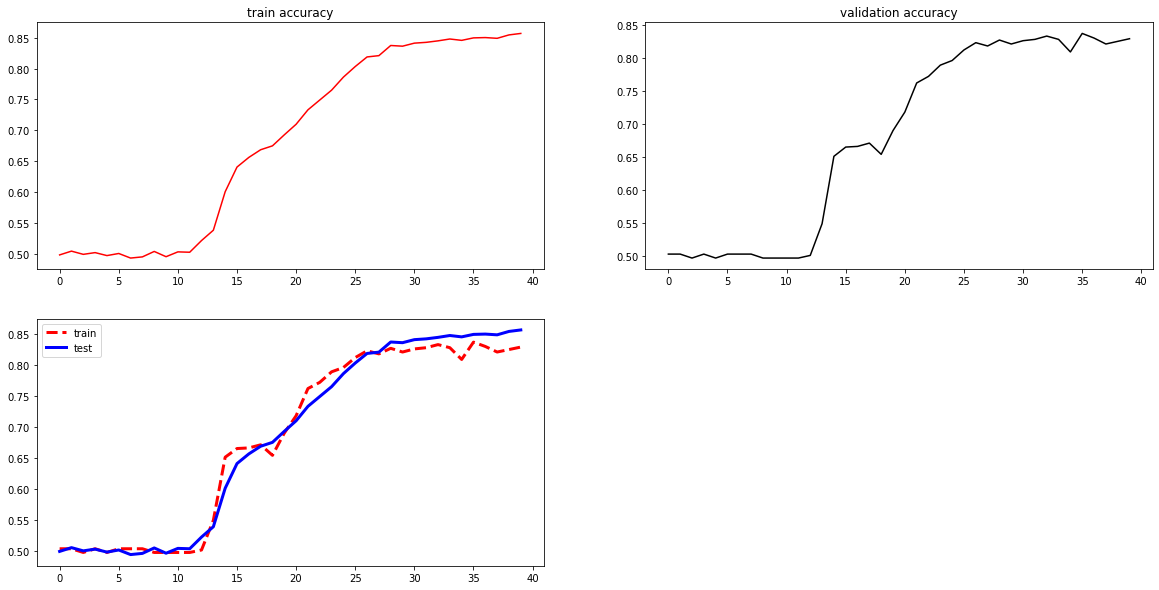

In [277]:
print(history2.history.keys())
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('train accuracy')
plt.plot(history2.history['accuracy'],'r')
plt.subplot(2,2,2)
plt.plot(history2.history['val_accuracy'],'k')
plt.title('validation accuracy')
plt.subplot(2,2,3)
plt.plot(history2.history['val_accuracy'],'r',linestyle='dashed',linewidth=3)
plt.plot(history2.history['accuracy'],'b',linewidth=3)
plt.legend(['train', 'test'], loc='upper left')

In [278]:
predic_results=model.predict(([inputs_test2,queries_test2]))

In [279]:
pre=model.predict([inputs_test2,queries_test2])

In [281]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [282]:
predic_results[0]

array([5.3070035e-12, 7.2381957e-12, 8.5621909e-12, 5.2551483e-12,
       4.7275890e-12, 5.1113718e-12, 6.6216754e-12, 4.5893259e-12,
       1.8828729e-02, 4.1383676e-12, 3.4557444e-12, 4.6529096e-12,
       4.8758172e-12, 5.9937203e-12, 3.8034805e-12, 4.3596303e-12,
       3.6240351e-12, 4.2836333e-12, 3.1063359e-12, 9.8117125e-01,
       3.7427990e-12, 5.6871365e-12, 4.0643977e-12, 4.2098278e-12,
       4.3543120e-12, 4.5526733e-12, 3.8240951e-12, 4.2881948e-12,
       5.2529842e-12, 5.7700008e-12, 3.9644043e-12, 4.6929999e-12,
       3.0184457e-12, 4.2093785e-12, 4.0919022e-12, 3.9830340e-12,
       5.0783123e-12, 3.6676356e-12], dtype=float32)

In [283]:
pre[0]

array([5.3070035e-12, 7.2381957e-12, 8.5621909e-12, 5.2551483e-12,
       4.7275890e-12, 5.1113718e-12, 6.6216754e-12, 4.5893259e-12,
       1.8828729e-02, 4.1383676e-12, 3.4557444e-12, 4.6529096e-12,
       4.8758172e-12, 5.9937203e-12, 3.8034805e-12, 4.3596303e-12,
       3.6240351e-12, 4.2836333e-12, 3.1063359e-12, 9.8117125e-01,
       3.7427990e-12, 5.6871365e-12, 4.0643977e-12, 4.2098278e-12,
       4.3543120e-12, 4.5526733e-12, 3.8240951e-12, 4.2881948e-12,
       5.2529842e-12, 5.7700008e-12, 3.9644043e-12, 4.6929999e-12,
       3.0184457e-12, 4.2093785e-12, 4.0919022e-12, 3.9830340e-12,
       5.0783123e-12, 3.6676356e-12], dtype=float32)

In [284]:
max_prob_result=predic_results.argmax()

In [285]:
max_prob_result

13927

In [286]:
max_prob_r=np.argmax(pre[0])

In [287]:
max_prob_r

19

In [291]:
for key,value in token.word_index.items():
    if value==max_prob_r:
        print(key)

no


In [292]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [293]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [294]:
test_data[0][2]

'no'

In [295]:
for key,value in token.word_index.items():
    if value==max_prob_r:
        print(key)

no


In [ ]:
max_prob_r=np.argmax(pre[])

### my own story which my model will ans

In [296]:
vocab  ### these are the only permisabal vocabulary
# my model aware of

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [324]:
my_stry='daniel grabbed football . Sandra dropped the football in the garden .'
my_stry.split()

['daniel',
 'grabbed',
 'football',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [302]:
my_ques='is football in the garden ?'
my_ques.split()

['is', 'football', 'in', 'the', 'garden', '?']

In [325]:
mydata = [(my_stry.split(),my_ques.split(),'yes')]

In [326]:
my_story,my_ques,my_ans = vector_from_story3(mydata,token,maxstry_len,maxques_len)

In [327]:
my_pre=model.predict([my_story,my_ques])

In [330]:
val_max = np.argmax(my_pre)

for key, val in token.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", my_pre[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.98631847
